# Math 210

## Jan 27, 2017

1. Modules and packages
2. An overview of scientific computing in Python
3. Exercises

## 1. Modules and Packages

Notice that we have been using the standard Python Library consisting of the the builtin functions (like `sum`,`len`, `round`, etc) and builtin datatypes (like `int`, `float`, `list`, etc).
But what if we want to do more like work with matrices and exponential functions and trigonometric functions? Python packages NumPy,SciPy, matplotlib, pandas and many more have been built for scientific computing and many other applications!

What is a package or a module? A module is simply a collection of functions and other things saved to a .py file (just like a text file with Python codes). A package is a whole collection of modules.

Let's gather all of number theory functions from last time!

In [1]:
def factorial(N):
    """Compute N!=N(N-1) ... (2)(1)"""
    # Initialize the outpout variable to 1
    product = 1
    for n in range(2,N + 1):
        # Update the output variable
        product = product * n
    return product

In [2]:
def n_choose_k(N,K):
    """Compute N choose K."""
    return factorial(N) // (factorial(N - K) * factorial(K))

In [3]:
def sum_of_squares(N):
    """Compute the sum of squares 1**2 + 2**2 + ... + N**2."""
    # Initialize the output variable
    the_sum = 0
    for n in range(1,N + 1):
        the_sum = the_sum + n**2
    return the_sum

In [4]:
def sum_of_squares2(N):
    """Compute the sum of squares 1**2 + 2**2 + ... + N**2."""
    return sum([d**2 for d in range(1,N + 1)])

In [5]:
def divisors(N):
    """Return the list of divisors of N."""
    # Initialize the list of divisors
    divisor_list = [1]
    # Check division by d for d <= N/2
    for d in range(2,N // 2 + 1):
        if N % d == 0:
            divisor_list.append(d)
    divisor_list.append(N)
    return divisor_list

In [ ]:
def is_square(N):
    """Determine if N is square."""
    return N == round(N**0.5)**2

In [6]:
def rep_as_squares(N):
    """Find all representations of N as a sum of squares a**2 + b**2 = N."""
    reps = []
    stop = int((N/2)**0.5)+1 
    for a in range(1,stop):
        b_squared = N - a**2
        if is_square(b_squared):
            b= round(b_squared)**0.5
            reps.append([a,b])
    return reps

In [7]:
def collatz(a):
    """Compute the Collatz sequence starting at a."""
    # Initialze the sequence with the fist value a.
    x_list = [a]
    # Continue computing values in the sequence until we reach 1.
    while x_list[-1] != 1:
        # Check if the last element in the list is even
        if x_list[-1] % 2 == 0:
            # Compute and append the new values
            x_list.append(x_list[-1] // 2)
        else:
            # Compute and append the new values
            x_list.append(3*x_list[-1] + 1)
    return x_list

In [3]:
import number_theory

Now all the functions in the file number_theory.oy are available to us! We use the dot notation to access them by name!

In [4]:
number_theory.is_prime(2017)

True

In [5]:
number_theory.rep_as_squares(2017)

[[9, 44.0]]

In [6]:
number_theory.rep_as_squares(2000000)

[[200, 1400.0], [584, 1288.0], [680, 1240.0], [1000, 1000.0]]

Let's answer some ques using our number theory module!

1. What is the smallest integer that can be expressed as a sum of squares in 5 ways?
2. What is the smallest prime number that can be expressed as a sum of squares in 3 ways?

In [14]:
for N in range(5525,10000):
    reps = number_theory.rep_as_squares(N)
    if len(reps)>5:
        print(N,'-',reps)

5525 - [[7, 74.0], [14, 73.0], [22, 71.0], [25, 70.0], [41, 62.0], [50, 55.0]]
9425 - [[4, 97.0], [20, 95.0], [31, 92.0], [41, 88.0], [55, 80.0], [64, 73.0]]


## 2. Overview of NumPy and Matplotlib

NumPy is the core scientific computing package. We use it to create arrays and do array operations. Matplotlib is the plotting library and depends on NumPy.


In [15]:
import numpy as np

In [16]:
x = np.linspace(0,1,101)

In [17]:
print(x)

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]


In [18]:
y=np.cos(x)

In [19]:
print(y)

[ 1.          0.99995     0.99980001  0.99955003  0.99920011  0.99875026
  0.99820054  0.997551    0.99680171  0.99595273  0.99500417  0.9939561
  0.99280864  0.99156189  0.990216    0.98877108  0.98722728  0.98558477
  0.98384369  0.98200424  0.98006658  0.97803091  0.97589745  0.9736664
  0.97133797  0.96891242  0.96638998  0.9637709   0.96105544  0.95824388
  0.95533649  0.95233357  0.94923542  0.94604234  0.94275467  0.93937271
  0.93589682  0.93232735  0.92866464  0.92490906  0.92106099  0.91712082
  0.91308894  0.90896575  0.90475166  0.9004471   0.8960525   0.89156829
  0.88699492  0.88233286  0.87758256  0.87274451  0.86781918  0.86280707
  0.85770868  0.85252452  0.84725511  0.84190098  0.83646265  0.83094068
  0.82533561  0.81964802  0.81387846  0.80802751  0.80209576  0.7960838
  0.78999223  0.78382167  0.77757272  0.77124601  0.76484219  0.75836188
  0.75180573  0.7451744   0.73846856  0.73168887  0.72483601  0.71791067
  0.71091354  0.70384532  0.69670671  0.68949843  0.68

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

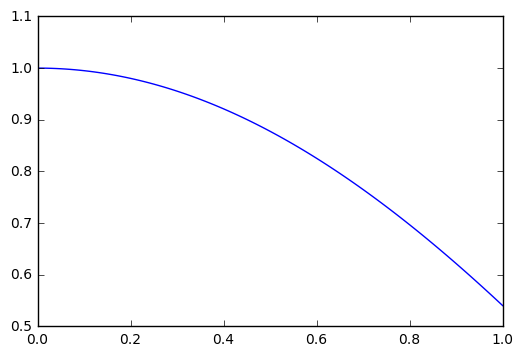

In [24]:
plt.plot(x,y)

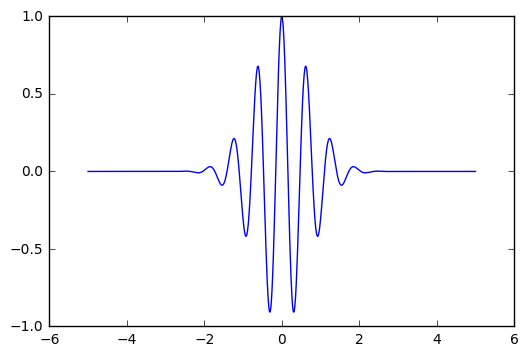

In [26]:
x= np.linspace(-5,5,1000)
y= np.exp(-x**2)*np.cos(10*x)
plt.plot(x,y)

In [1]:
round(9.9)

10